In this step we will be importing the lobraries needed and 

In [1]:
import mne
import os 
import numpy as np
from mne.io import read_raw_edf
from mne.preprocessing import ICA, create_eog_epochs

Extracting EDF parameters from c:\Users\jlriv\Downloads\GitHub Projects\EEG Research\DashaX_NeuroSpeak\software\data_cleaning\Imagined_speech_EEG_edf\Char\name0_A.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 1535  =      0.000 ...    11.992 secs...
Using matplotlib as 2D backend.


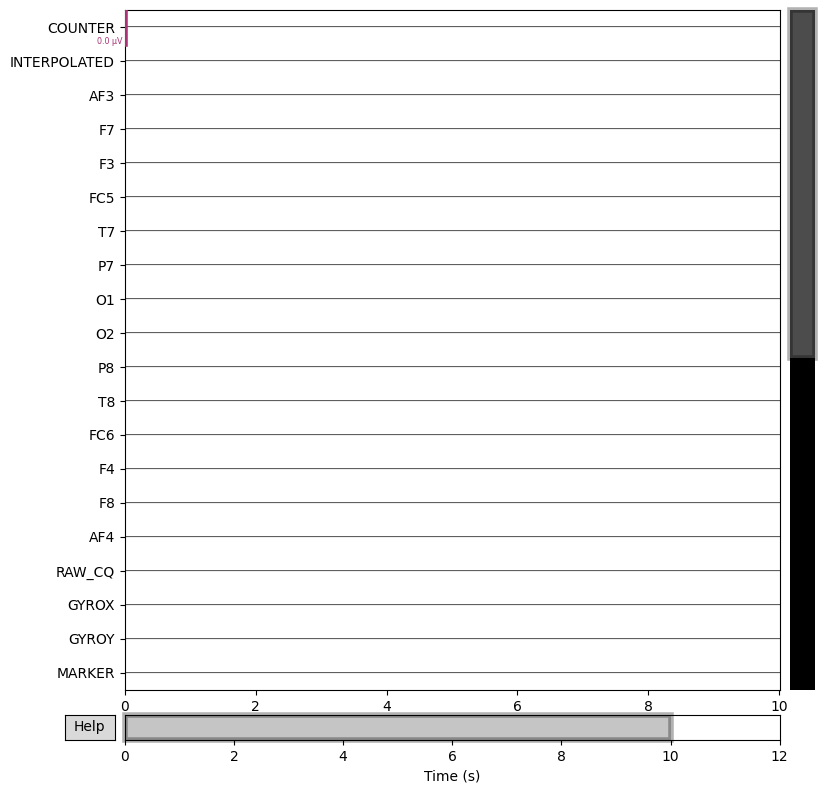

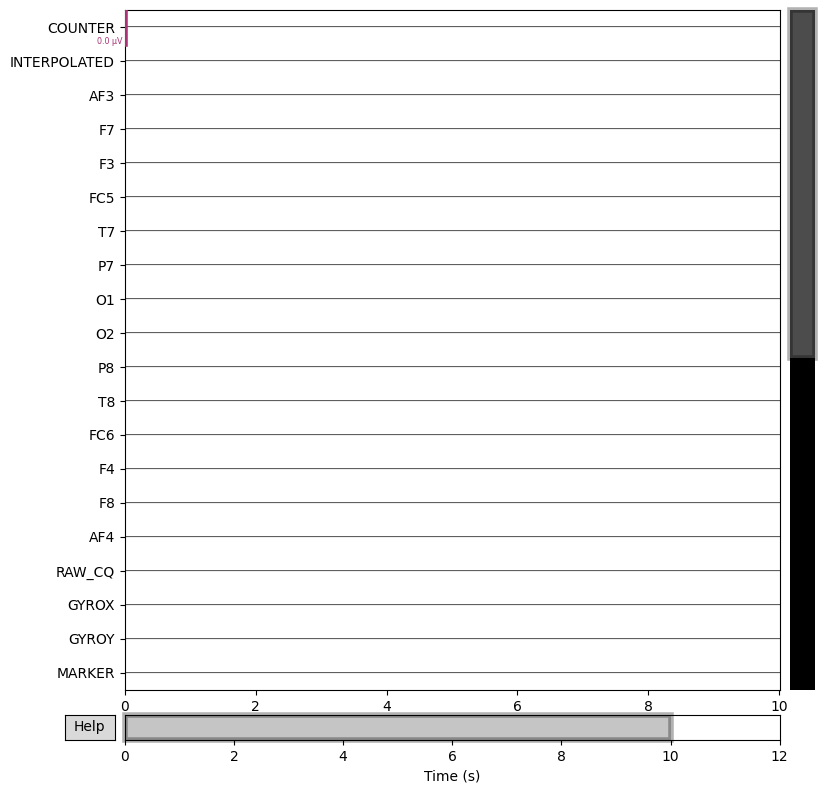

In [2]:
DATASET_CHAR = '../data_cleaning/Imagined_speech_EEG_edf/Char/name0_A.edf'
raw = read_raw_edf(DATASET_CHAR, preload=True)
raw.plot(scalings='auto')

In [3]:
raw.ch_names

['COUNTER',
 'INTERPOLATED',
 'AF3',
 'F7',
 'F3',
 'FC5',
 'T7',
 'P7',
 'O1',
 'O2',
 'P8',
 'T8',
 'FC6',
 'F4',
 'F8',
 'AF4',
 'RAW_CQ',
 'GYROX',
 'GYROY',
 'MARKER',
 'SYNC',
 'TIME_STAMP_s',
 'TIME_STAMP_ms',
 'CQ_AF3',
 'CQ_F7',
 'CQ_F3',
 'CQ_FC5',
 'CQ_T7',
 'CQ_P7',
 'CQ_O1',
 'CQ_O2',
 'CQ_P8',
 'CQ_T8',
 'CQ_FC6',
 'CQ_F4',
 'CQ_F8',
 'CQ_AF4',
 'CQ_CMS',
 'CQ_DRL']

In [4]:
print(raw.info)

<Info | 8 non-empty values
 bads: []
 ch_names: COUNTER, INTERPOLATED, AF3, F7, F3, FC5, T7, P7, O1, O2, P8, T8, ...
 chs: 39 EEG
 custom_ref_applied: False
 highpass: 0.0 Hz
 lowpass: 64.0 Hz
 meas_date: 2017-02-25 19:41:49 UTC
 nchan: 39
 projs: []
 sfreq: 128.0 Hz
 subject_info: <subject_info | his_id: 1>
>


In [5]:
raw.pick_types(meg=False, eeg=True, eog=False, ecg=False, emg=False, ref_meg=False)
raw.set_eeg_reference(projection=True)
raw_notched = raw.copy()
raw_notched.notch_filter(freqs=[60], picks='eeg')
filteredData = raw_notched

NOTE: pick_types() is a legacy function. New code should use inst.pick(...).
EEG channel type selected for re-referencing
Adding average EEG reference projection.
1 projection items deactivated
Average reference projection was added, but has not been applied yet. Use the apply_proj method to apply it.
Filtering raw data in 1 contiguous segment
Setting up band-stop filter from 59 - 61 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandstop filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 59.35
- Lower transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 59.10 Hz)
- Upper passband edge: 60.65 Hz
- Upper transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 60.90 Hz)
- Filter length: 845 samples (6.602 s)



[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  39 out of  39 | elapsed:    0.0s finished


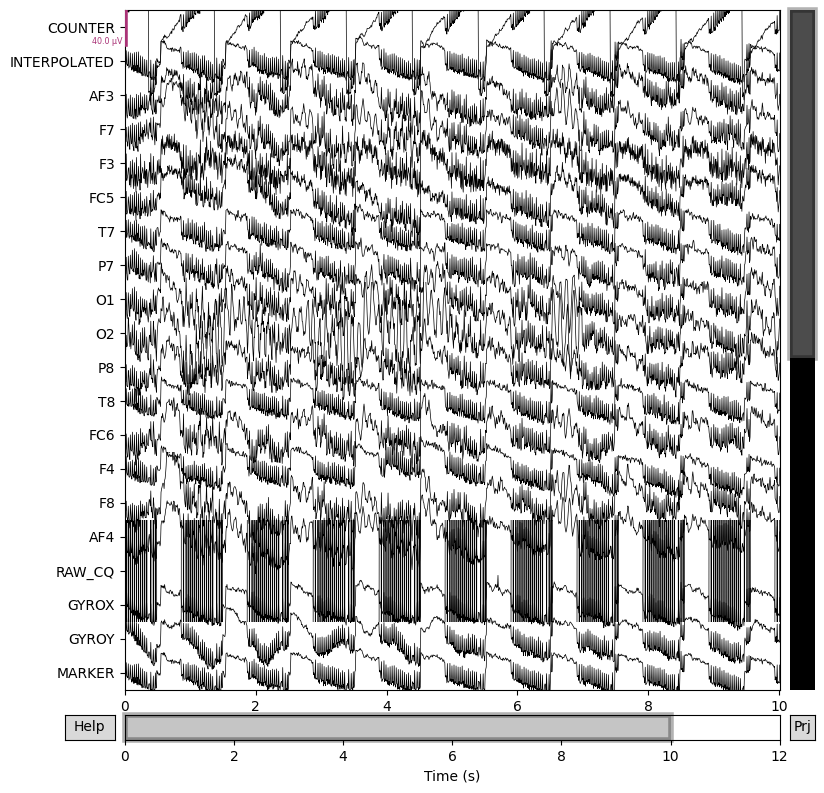

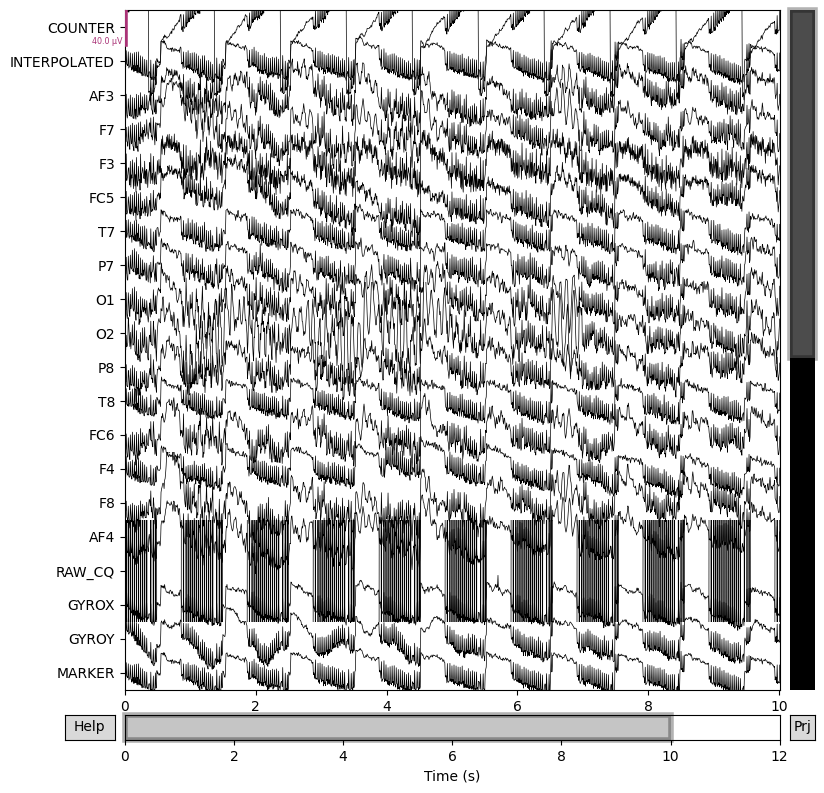

In [6]:
filteredData.plot()

Fitting ICA to data using 39 channels (please be patient, this may take a while)
Selecting by number: 14 components


C:\Users\jlriv\AppData\Local\Temp\ipykernel_6396\3620089511.py:1: RuntimeWarning: The data has not been high-pass filtered. For good ICA performance, it should be high-pass filtered (e.g., with a 1.0 Hz lower bound) before fitting ICA.
  icaData = ICA(n_components=14, method='fastica', max_iter=10000000, random_state=42).fit(filteredData)


Fitting ICA took 0.3s.
Applying ICA to Raw instance
    Transforming to ICA space (14 components)
    Zeroing out 1 ICA component
    Projecting back using 39 PCA components


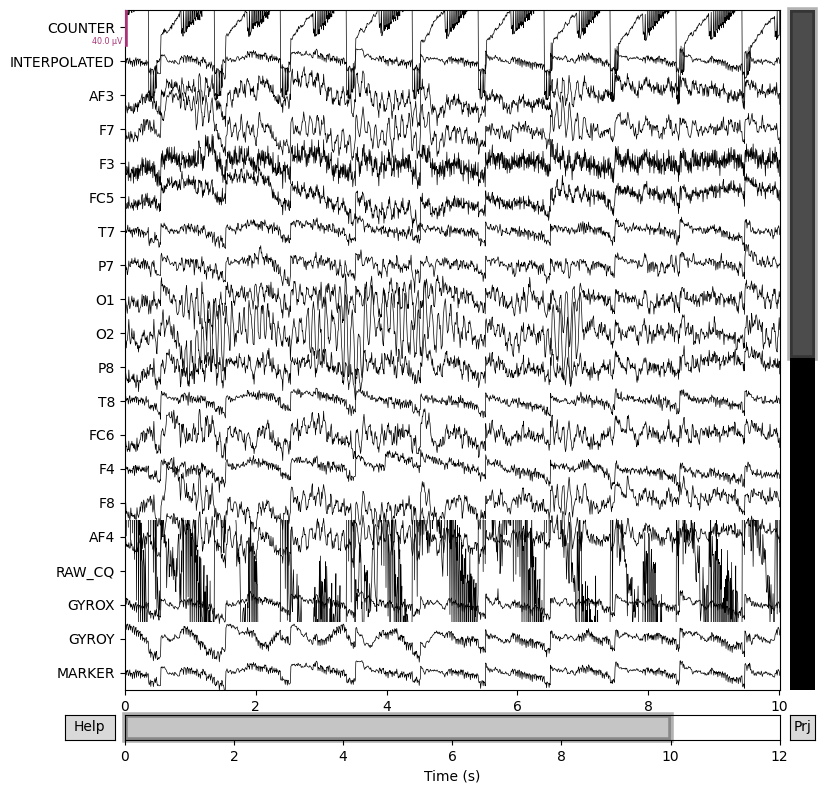

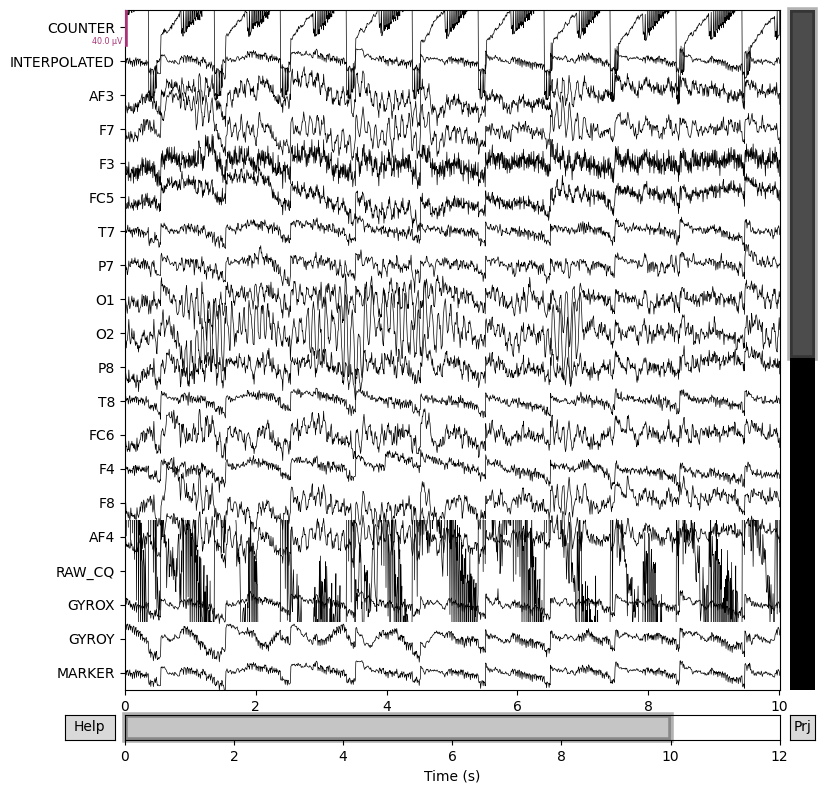

In [7]:
icaData = ICA(n_components=14, method='fastica', max_iter=10000000, random_state=42).fit(filteredData)
icaData.exclude = [0]
raw_clean = icaData.apply(filteredData.copy())
raw_clean.plot()